# Earnings Based on College Majors Data Analysis and Visualization 

In this project I will explore the vast U.S. majors data ranging from January 2010 to 2012, available at [US Census Bureau](https://www.census.gov/programs-surveys/acs/data/pums.html). The data was cleaned by [FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/college-majors) and I will be using this cleaned dataset to answer the following questions:



### Do students in more popular majors make more money?
    
### Which majors are predominantly made up of male or female graduates?
    
### Which category of majors have the most students?


To accomplish this I will do the following:

1. Explore the Data
2. Clean the Data
3. Analyze the Data
4. Make Conclusions from my analysis



### 1. Explore the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

rgrads = pd.read_csv('recent-grads.csv')

print(rgrads.iloc[0])
print(rgrads.head())
print(rgrads.tail())
print(rgrads.describe())

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

From my brief exploration of the data I can see the following:

- There are 173 Majors listed and only 172 represented in all column categories
- There are rows with missing values, which must be dropped in order to use the matplotlib visualizations properly

### 2. Clean the Data

In [2]:
rgrads = rgrads.dropna()
rgrads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


From my brief exploration of the cleaned data I can see the following:

- Only one row was dropped from the dataset, going from 173 to 172 rows
- The `ShareWomen` column title can also be changed to snakecase to be uniform with the rest of the data

In [3]:
rgrads.columns = rgrads.columns.str.replace('ShareWomen','Share_women')
rgrads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,Share_women,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


### 3. Analyze the Data

Text(0.5, 1.0, 'Employed vs. Sample_size')

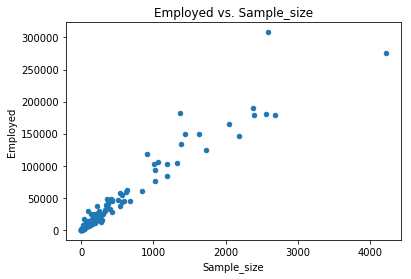

In [4]:
ax = rgrads.plot(x='Sample_size', y='Employed', kind='scatter')
ax.set_title('Employed vs. Sample_size')

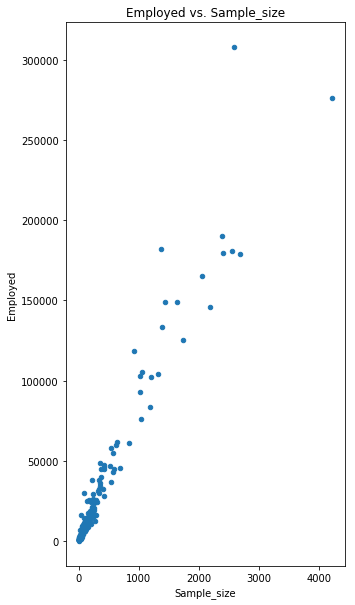

In [5]:
rgrads.plot(x='Sample_size', y='Employed', kind='scatter', title='Employed vs. Sample_size', figsize=(5,10))

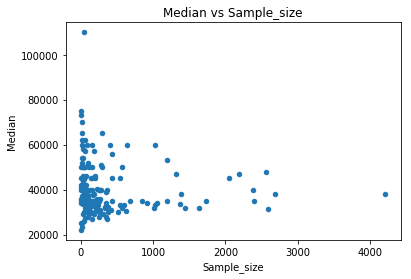

In [6]:
rgrads.plot(x='Sample_size', y='Median', kind='scatter', title='Median vs Sample_size')

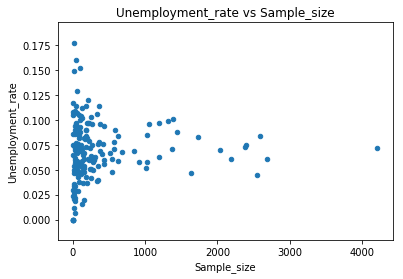

In [7]:
rgrads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Unemployment_rate vs Sample_size')

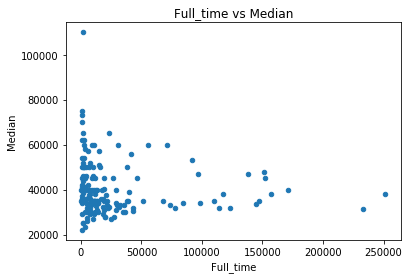

In [8]:
rgrads.plot(x='Full_time', y='Median', kind='scatter', title='Full_time vs Median')

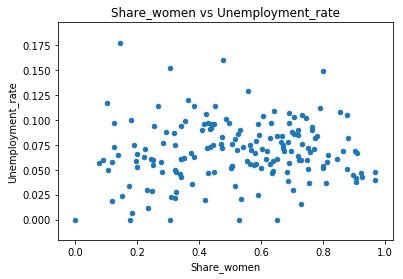

In [9]:
rgrads.plot(x='Share_women', y='Unemployment_rate', kind='scatter', title='Share_women vs Unemployment_rate')

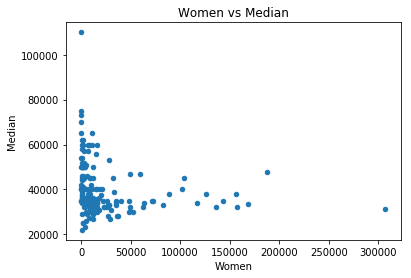

In [10]:
rgrads.plot(x='Women', y='Median', kind='scatter', title='Women vs Median')

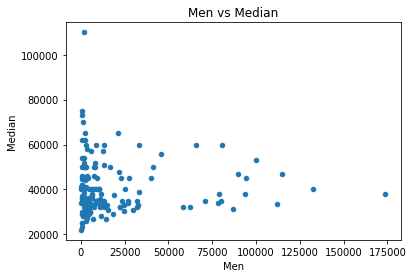

In [11]:
rgrads.plot(x='Men', y='Median', kind='scatter', title='Men vs Median')

From my analysis of these scatter plots I can see the following:


- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money?
- Is there any link between the number of full-time employees and median salary?


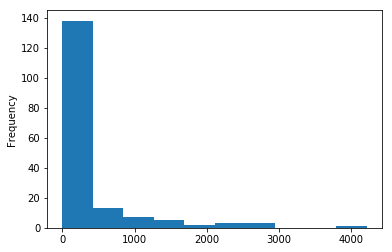

In [12]:
rgrads['Sample_size'].plot(kind='hist')

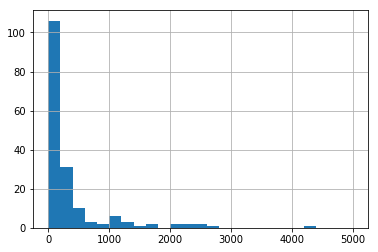

In [13]:
rgrads['Sample_size'].hist(bins=25, range=(0,5000))

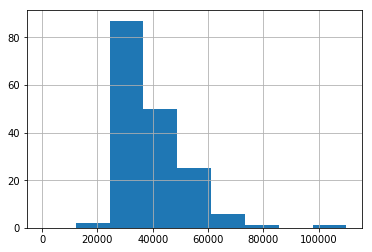

In [14]:
rgrads['Median'].hist(bins=9, range=(0,110000))

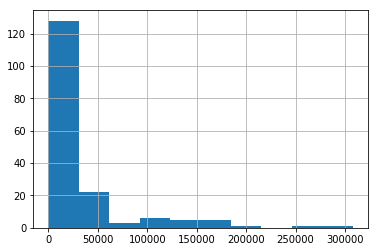

In [15]:
rgrads['Employed'].hist()

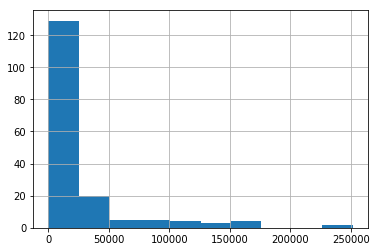

In [16]:
rgrads['Full_time'].hist()

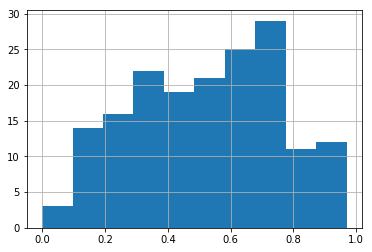

In [17]:
rgrads['Share_women'].hist()

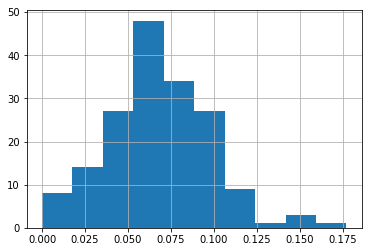

In [18]:
rgrads['Unemployment_rate'].hist()

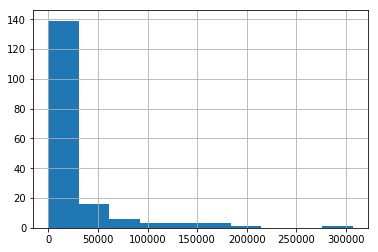

In [19]:
rgrads['Women'].hist()

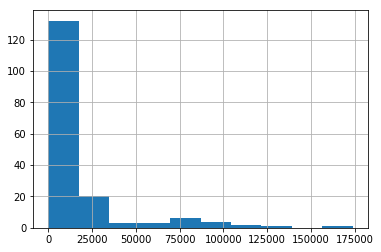

In [20]:
rgrads['Men'].hist()

From my analysis of these scatter plots I can see the following:

- What percent of majors are predominantly male? Predominantly female?
- What's the most common median salary range?


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb464179eb8>,
      dtype=object)

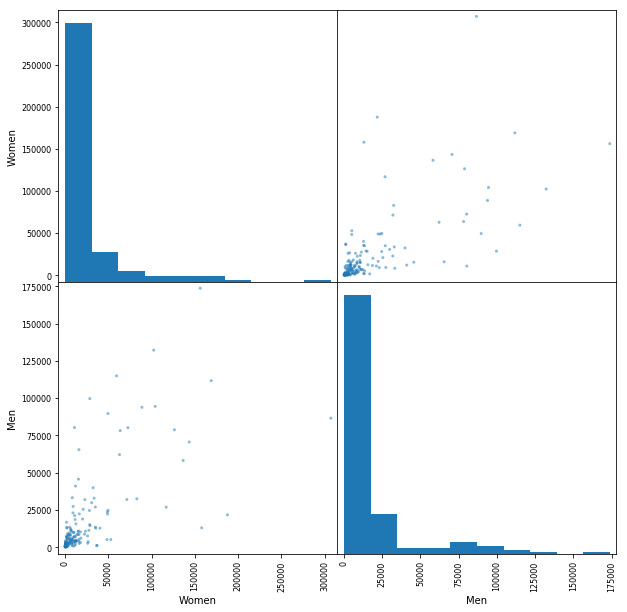

In [21]:
from pandas.plotting import scatter_matrix as sm
sm(rgrads[['Women', 'Men']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb464aad080>,
      dtype=object)

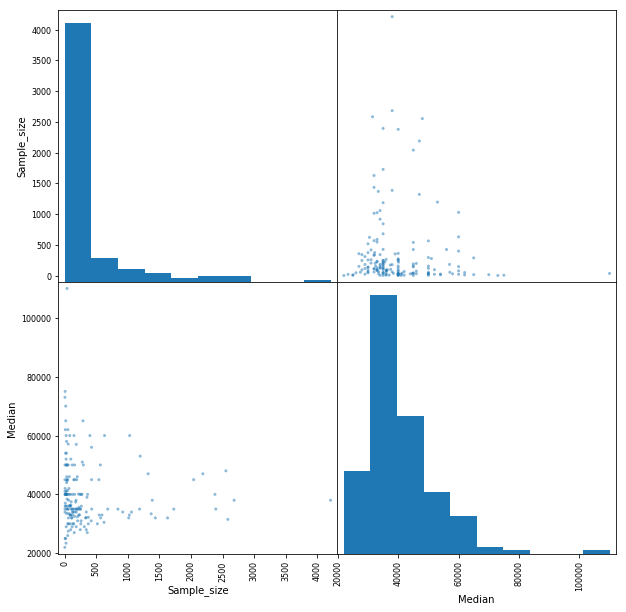

In [22]:
sm(rgrads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb463cb0390>,
      dtype=object)

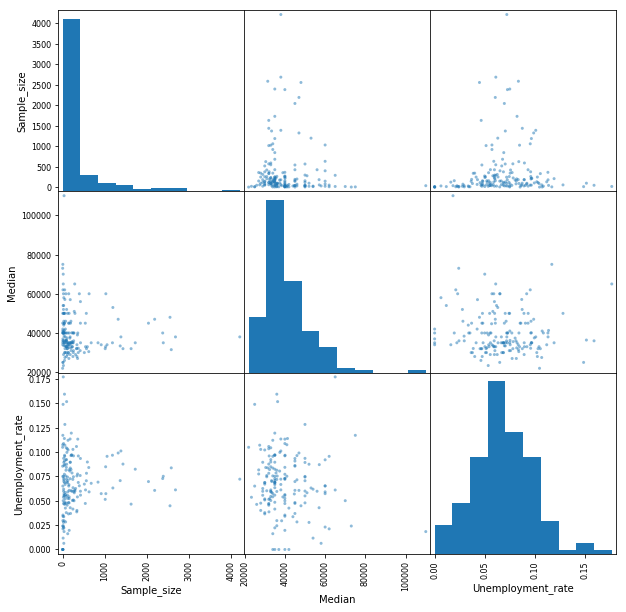

In [23]:
sm(rgrads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

From my analysis of these scatter matrix plots I can see the following:

- What percent of majors are predominantly male? Predominantly female?
- What's the most common median salary range?


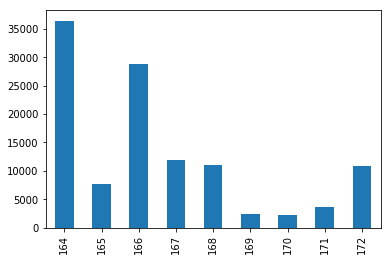

In [24]:
rgrads[:10]['Women'].plot(kind='bar')
rgrads[-9:]['Women'].plot(kind='bar')

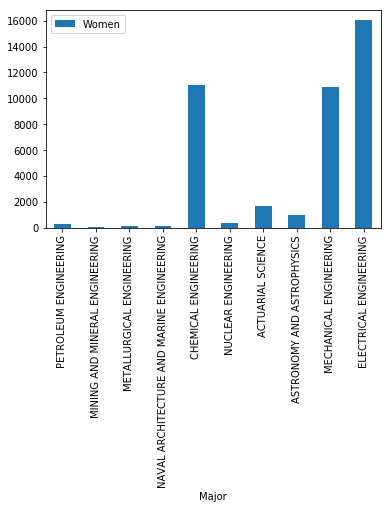

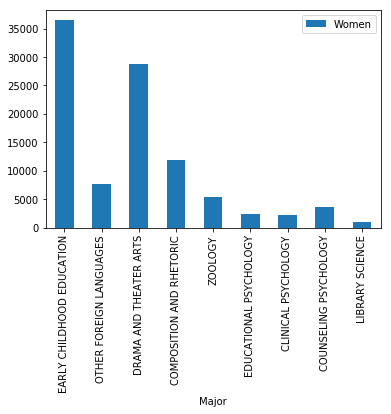

In [25]:
rgrads[:10].plot.bar(x='Major', y='Women')
rgrads[-9:].plot.bar(x='Major', y='Women')

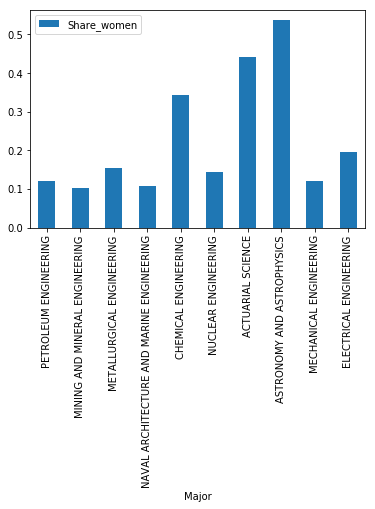

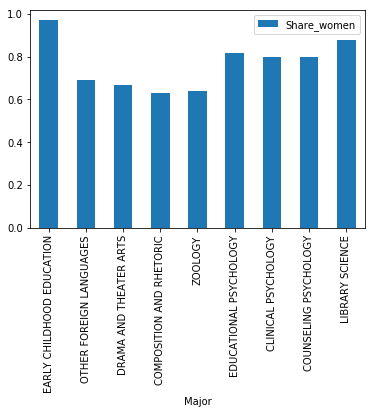

In [26]:
rgrads[:10].plot.bar(x='Major', y='Share_women')
rgrads[-9:].plot.bar(x='Major', y='Share_women')

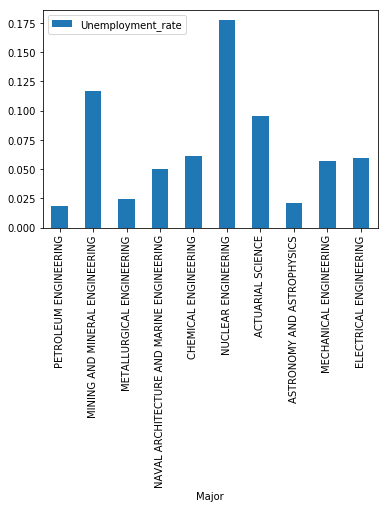

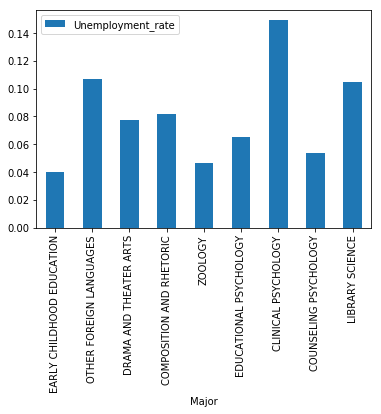

In [27]:
rgrads[:10].plot.bar(x='Major', y='Unemployment_rate')
rgrads[-9:].plot.bar(x='Major', y='Unemployment_rate')

From my analysis of the bar plots, I can see the following:

- Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
- Use a box plot to explore the distributions of median salaries and unemployment rate.
- Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.


### 1. Conclusion